## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("D:/")

## Data Collection and Data Analysis

In [4]:
df=pd.read_csv("gld_price_data.csv")

In [6]:
# print top 5 row of dataset
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# show information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# show statsitical measure of dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# print number of row and column
df.shape

(2290, 6)

In [11]:
# chech null value of dataset
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# create a correlation of dataset
corr=df.corr()

<AxesSubplot:>

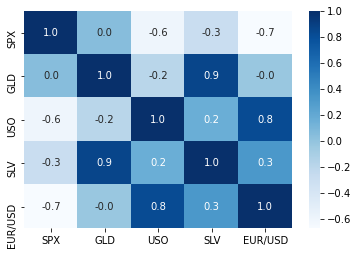

In [16]:
# understand the correlation with heatmap
sns.heatmap(corr,fmt=".1f",annot=True,cmap="Blues")

In [18]:
print(corr["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

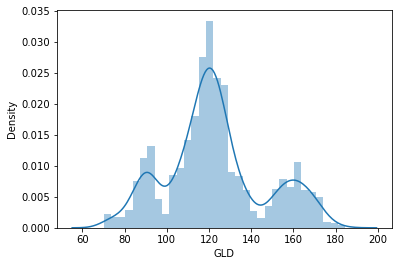

In [40]:
sns.distplot(df["GLD"])

## Data Preprocessing
## Train Test Split

In [19]:
# separate the data and label
x=df.drop(["Date","GLD"],axis=1)
y=df.GLD

In [20]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [22]:
# load train test split library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


## Model Building

In [24]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [25]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error

In [37]:
# check R2 score on training data
y_train_pred=model.predict(x_train)
r2_score_y=r2_score(y_train,y_train_pred)
mae=mean_absolute_error(y_train,y_train_pred)
print("Train Data R2 Score:",r2_score_y)
print("Train Data Mean Absolute Error:",mae)

Train Data R2 Score: 0.998279298266698
Train Data Mean Absolute Error: 0.487277169688862


In [38]:
# check R2 score on test data
y_test_pred=model.predict(x_test)
r2_score_test=r2_score(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
print("Test Data R2 Score:",r2_score_test)
print("Test Data Mean Absolute Error:",mae)

Test Data R2 Score: 0.9892818651414594
Test Data Mean Absolute Error: 1.276372056593886


## Making a Predictive System

In [43]:
input_data=(1325.540039,37.130001,33.360001,1.317003)

# convert input data to a numpy array
input_data_numpy_array=np.asarray(input_data)

# reshape the input data
reshape_input_data=input_data_numpy_array.reshape(1,-1)

# prediction the input data
prediction=model.predict(reshape_input_data)
print(prediction)

[170.04960026]
